In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## load model

In [2]:
from tensorflow import keras
model = keras.models.load_model('gru_model')

'''
eth_model_60 = keras.models.load_model('gru_model')
eth_model_1440 = keras.models.load_model('gru_model')
...
btc_model = keras.models.load_model('gru_model')
'''

## load ETH data

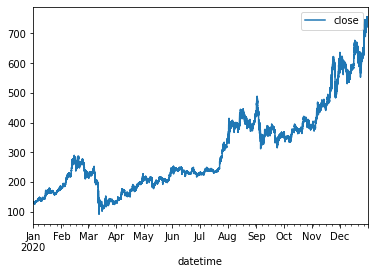

In [5]:
import logging
logging.getLogger().setLevel(level=logging.WARNING)

eth_data = pd.read_csv('ETH-USD.csv')
# set index of dataframe to be datetime column

eth_data["datetime"] = pd.to_datetime(eth_data["datetime"])
ind_eth_data = eth_data.set_index(["datetime"], drop=True)

# sorting the dataset in ascending order of date
eth_data_frame = ind_eth_data.sort_index(axis=1 ,ascending=True)
eth_data_frame.head()

#filter to just closing price
eth_df = eth_data_frame[["close"]]

eth_df.head()


eth_df.plot()


#scale data by subtracting mean and dividing by STD
eth_sc = StandardScaler()

eth_test = eth_sc.fit_transform(eth_df)

eth_test_t = eth_test.reshape(eth_test.shape[0], 1, eth_test.shape[1]) # (106559, 1, 1)



#ax = eth_test_sc.plot(kind='line',figsize=(12,8))
#plt.legend(['test'])

## call model

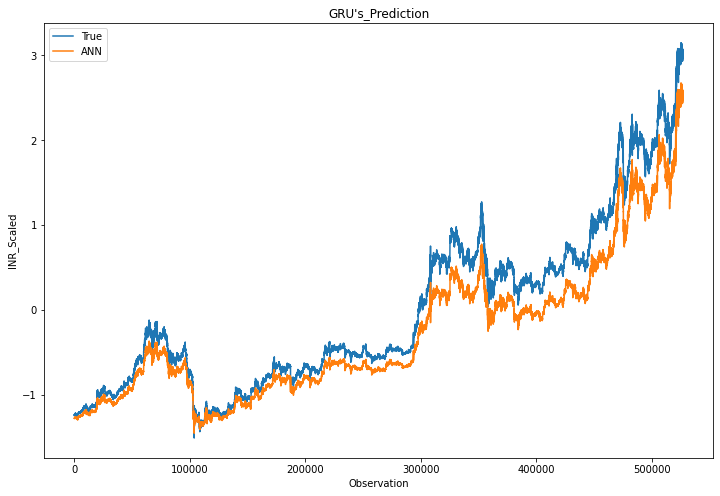

In [7]:
eth_pred = model.predict(eth_test_t)

plt.figure(figsize=(12,8))
plt.plot(eth_test, label='True')
plt.plot(eth_pred, label='ANN')
plt.title("GRU's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

## unscale normalized output back to prices

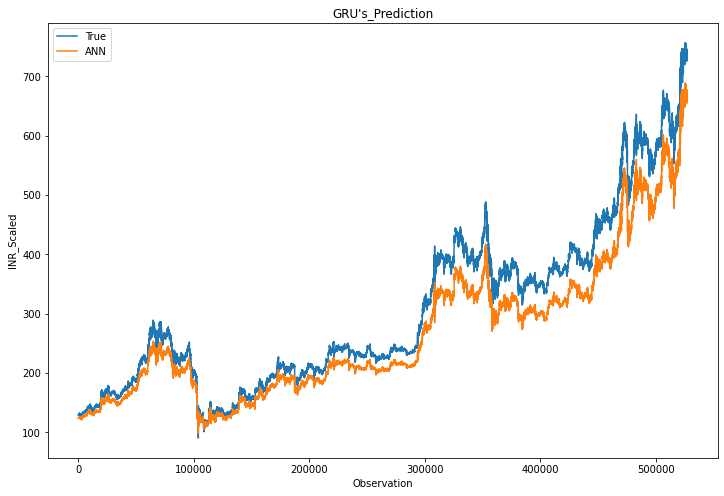

In [9]:
eth_pred_scaled = eth_sc.inverse_transform(eth_pred)
eth_test_scaled = eth_sc.inverse_transform(eth_test)


plt.figure(figsize=(12,8))
plt.plot(eth_test_scaled, label='True')
plt.plot(eth_pred_scaled, label='ANN')
plt.title("GRU's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

## predicting values iteratively

In [14]:
K.clear_session() # clear model memory between disparate runs
for x in eth_test_t:
    y = model.predict(np.expand_dims(x, axis=1))
    print(x, y)

[[-1.24255934]] [[-1.277548]]
[[-1.24255934]] [[-1.277548]]
[[-1.24297866]] [[-1.2778505]]
[[-1.24269911]] [[-1.2776489]]
[[-1.24297866]] [[-1.2778505]]
[[-1.24402694]] [[-1.2786063]]
[[-1.24367751]] [[-1.2783544]]
[[-1.24304854]] [[-1.2779009]]
[[-1.24269911]] [[-1.2776489]]
[[-1.24290877]] [[-1.2778002]]
[[-1.24290877]] [[-1.2778002]]
[[-1.24297866]] [[-1.2778505]]
[[-1.24339797]] [[-1.278153]]
[[-1.24346786]] [[-1.2782034]]
[[-1.2432582]] [[-1.2780523]]
[[-1.24241957]] [[-1.2774471]]
[[-1.24241957]] [[-1.2774471]]
[[-1.24248946]] [[-1.2774976]]
[[-1.24241957]] [[-1.2774471]]
[[-1.24241957]] [[-1.2774471]]
[[-1.24248946]] [[-1.2774976]]
[[-1.24241957]] [[-1.2774471]]
[[-1.24262923]] [[-1.2775984]]
[[-1.24332809]] [[-1.2781025]]
[[-1.2432582]] [[-1.2780523]]
[[-1.24290877]] [[-1.2778002]]
[[-1.24332809]] [[-1.2781025]]
[[-1.24339797]] [[-1.278153]]
[[-1.24339797]] [[-1.278153]]
[[-1.24346786]] [[-1.2782034]]
[[-1.24207014]] [[-1.277195]]
[[-1.24200026]] [[-1.2771444]]
[[-1.24200026]] 

[[-1.23382364]] [[-1.2712234]]
[[-1.23242592]] [[-1.2702073]]
[[-1.23207649]] [[-1.2699531]]
[[-1.23193672]] [[-1.2698516]]
[[-1.23172707]] [[-1.269699]]
[[-1.23179695]] [[-1.26975]]
[[-1.23144752]] [[-1.2694956]]
[[-1.23151741]] [[-1.2695463]]
[[-1.23165718]] [[-1.2696482]]
[[-1.23179695]] [[-1.26975]]
[[-1.23228615]] [[-1.2701056]]
[[-1.23214638]] [[-1.270004]]
[[-1.23186684]] [[-1.2698005]]
[[-1.23186684]] [[-1.2698005]]
[[-1.23172707]] [[-1.269699]]
[[-1.23179695]] [[-1.26975]]
[[-1.23172707]] [[-1.269699]]
[[-1.23165718]] [[-1.2696482]]
[[-1.23151741]] [[-1.2695463]]
[[-1.23179695]] [[-1.26975]]
[[-1.23368386]] [[-1.2711216]]
[[-1.23368386]] [[-1.2711216]]
[[-1.23361398]] [[-1.2710711]]
[[-1.23361398]] [[-1.2710711]]
[[-1.23368386]] [[-1.2711216]]
[[-1.23382364]] [[-1.2712234]]
[[-1.23396341]] [[-1.2713249]]
[[-1.23452249]] [[-1.2717309]]
[[-1.23452249]] [[-1.2717309]]
[[-1.23445261]] [[-1.2716801]]
[[-1.23396341]] [[-1.2713249]]
[[-1.23340432]] [[-1.2709187]]
[[-1.23284524]] [[-1

[[-1.23004981]] [[-1.2684776]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23123787]] [[-1.2693429]]
[[-1.23151741]] [[-1.2695463]]
[[-1.23144752]] [[-1.2694956]]
[[-1.23144752]] [[-1.2694956]]
[[-1.23123787]] [[-1.2693429]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.2310981]] [[-1.2692411]]
[[-1.23095832]] [[-1.2691393]]
[[-1.23095832]] [[-1.2691393]]
[[-1.23095832]] [[-1.2691393]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23074867]] [[-1.2689866]]
[[-1.23074867]] [[-1.2689866]]
[[-1.23074867]] [[-1.2689866]]
[[-1.23074867]] [[-1.2689866]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23067878]] [[-1.2689358]]
[[-1.23088844]] 

KeyboardInterrupt: 